<a href="https://colab.research.google.com/github/JosselynChila/ANNProyecto/blob/master/ANNProyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler,MinMaxScaler




In [2]:
data = pd.read_csv("water_potability.csv")
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
data['ph'].fillna(value=data['ph'].median(),inplace=True)
data['Sulfate'].fillna(value=data['Sulfate'].median(),inplace=True)
data['Trihalomethanes'].fillna(value=data['Trihalomethanes'].median(),inplace=True)

In [4]:
X = data.drop('Potability',axis=1).values
y = data['Potability'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=109)

In [5]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
oculta1=tf.keras.layers.Dense(units=64, input_dim=9, activation="relu")
oculta3=tf.keras.layers.Dropout(0.5)
oculta2=tf.keras.layers.Dense(units=64,activation="relu")
oculta4=tf.keras.layers.Dropout(0.7)
oculta5=tf.keras.layers.Dense(units=64,activation="relu")
oculta6=tf.keras.layers.Dropout(0.3)
oculta7=tf.keras.layers.Dense(units=64,activation="relu")
salida=tf.keras.layers.Dense(units=1,activation="sigmoid")
modelo=tf.keras.Sequential([oculta1,oculta3,oculta2,oculta4,oculta5,oculta6,oculta7,salida])
modelo.compile(
    optimizer="adam",
    loss='mse',
    metrics=["accuracy"]
)

In [7]:
historial1=modelo.fit(X_train,y_train,epochs=200,batch_size=5)

accuracy=modelo.evaluate(X_test,y_test)

y_pred=modelo.predict(X_test)

Epoch 1/200
459/459 [==============================] - 3s 2ms/step - loss: 0.2411 - accuracy: 0.6040
Epoch 2/200
459/459 [==============================] - 1s 2ms/step - loss: 0.2374 - accuracy: 0.6236
Epoch 3/200
459/459 [==============================] - 1s 2ms/step - loss: 0.2366 - accuracy: 0.6184
Epoch 4/200
459/459 [==============================] - 1s 2ms/step - loss: 0.2352 - accuracy: 0.6219
Epoch 5/200
459/459 [==============================] - 1s 2ms/step - loss: 0.2349 - accuracy: 0.6201
Epoch 6/200
459/459 [==============================] - 1s 2ms/step - loss: 0.2316 - accuracy: 0.6328
Epoch 7/200
459/459 [==============================] - 1s 2ms/step - loss: 0.2290 - accuracy: 0.6367
Epoch 8/200
459/459 [==============================] - 1s 2ms/step - loss: 0.2277 - accuracy: 0.6297
Epoch 9/200
459/459 [==============================] - 1s 2ms/step - loss: 0.2264 - accuracy: 0.6411
Epoch 10/200
459/459 [==============================] - 1s 2ms/step - loss: 0.2264 - accura

accuracy: 62.77%


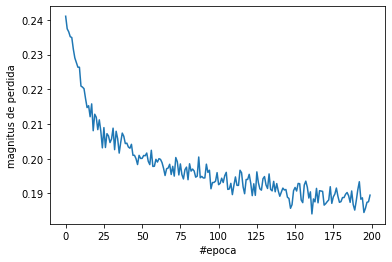

In [8]:
import matplotlib.pyplot as plt

plt.xlabel("#epoca")
plt.ylabel("magnitus de perdida")
plt.plot(historial1.history["loss"])
print("%s: %.2f%%" % (modelo.metrics_names[1], accuracy[1] * 100))
